# Analysis of the dialogs in "L'avare" of Molière
Student : Hugo Alexander Gonzalez Reyes

## 1. 
Classify the characters according to their amount of speech using a syntactic analysis of the text (scenes / lines / words). In particular, which character speaks the most? Which one does not speak at all? Note that the names of the characters are not necessarily uniform, case and the presence of accents may vary, for example.

Before doing any work let's install and import all the libraries that we will use trought the document.

In [1]:
#It is better to be sure that we have all the required pakages
!pip install numpy --upgrade
!pip install urllib3
!pip install pandas --upgrade
!pip install nltk
!pip install pandas plotnine
!pip install networkx

import urllib.request #library to make web requests and retrieve files
import unicodedata #built-in tool to work with different text formats (e.g. UTF-8)
import pandas as pd #library that allows to work with dataframes
import numpy as np #library that provides tools to work with matrices
import string #built-in tool to work with strings
import nltk #tokenizer library
nltk.download('punkt') #download the tokenizer models
from plotnine import * #library to plot the text analisys
import networkx as nx #graphs library
import matplotlib.pyplot as plt # library to plot the graphs built with networkx

     |████████████████████████████████| 14.5 MB 11.8 MB/s eta 0:00:01    |███                             | 1.3 MB 11.8 MB/s eta 0:00:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.2
    Uninstalling numpy-1.15.2:
      Successfully uninstalled numpy-1.15.2
     |████████████████████████████████| 9.5 MB 9.1 MB/s eta 0:00:01    |▏                               | 40 kB 9.3 MB/s eta 0:00:02     |██████▎                         | 1.9 MB 9.1 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
     |████████████████████████████████| 1.4 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 302 kB 38.6 MB/s eta 0:00:01
     |████████████████████████████████| 723 kB 52.7 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434677 sha256=4f

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


With the enviroment set and done we proceed to download the book. We convert the document to a readable format and we print a fragment of it.

In [2]:
url = "http://dramacode.github.io/markdown/moliere_avare.txt"

file = urllib.request.urlopen(url)
readable_doc = []
for line in file:
    decoded_line = line.decode("utf-8") #we decode the line
    decoded_line = unicodedata.normalize("NFKD", decoded_line) #we normalize some weird characters that might appear when working with strings
    if decoded_line != '\n':
      readable_doc.append(decoded_line) 
print(''.join(readable_doc[0:40]))

---
identifier: moliere_avare  
creator: Molière.  
date: 1668  
title: L'Avare. Comédie  
---
L'AVARE,
COMÉDIE.
Par J.B.P. MOLIÈRE.
À PARIS, Chez JEAN RIBOU, au Palais, vis à vis la Porte de l'Église de la Sainte Chapelle, à l'Image Saint-Louis. M. DC. LXIX. *AVEC PRIVILÈGE DU ROI*
# ACTEURS.
 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.
 – Cléante, Fils d'Harpagon, Amant de Mariane.
 – Élise, Fille d'Harpagon, Amante de Valère.
 – Valère, Fils d'Anselme, et Amant d'Élise.
 – Mariane, Amante de Cléante, et aimée d'Harpagon.
 – Anselme, Père de Valère et de Mariane.
 – Frosine, Femme d'Intrigue.
 – Maitre Simon, Courtier.
 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.
 – La Flèche, Valet de Cléante.
 – Dame Claude, Servante d'Harpagon.
 – Brindavoine, laquais d'Harpagon.
 – La Merluche, laquais d'Harpagon.
 – Le commissaire, et son clerc.
La Scène est à Paris.
# L'Avare, *Comédie.*.
## Acte Premier.
### Scène Première.
Valère, Élise


We observe that the book follows a structure.
* Each act is announced with a "##".
* Each scene is announced with a "###".
* The line after the scene presents all the actors playing in it.
* For each dialog, the name of the actor is shown starting with four blank spaces and followed by their corresponding lines.

Following this guidelines we can make a first list structure of the whole text.

In [3]:
acte = ""
scene = ""
acteur = ""
set_acteurs = ""
dialogues = []

start = False
save_aut_set = False

for decoded_line in readable_doc:
      if save_aut_set:
          set_acteurs = decoded_line.replace("\n","").replace(".","").strip().upper()
          save_aut_set = False
      if decoded_line[:3] == "###":
          start = False 
          scene = decoded_line[4:-2].replace("Scène ","").strip()
          save_aut_set = True
      elif decoded_line[:2] == "##":
          acte = decoded_line[3:-2].replace("Acte ","").strip()
      elif decoded_line[:4] == "    ":
          start = True
          acteur = decoded_line.strip()[:-1]
      elif start:
          dialogues.append([acte, scene, set_acteurs, acteur,decoded_line.replace("\n","")])
print(dialogues[0])
print(dialogues[1])

['Premier', 'Première', 'VALÈRE, ÉLISE', 'VALÈRE', "Hé quoi, charmante Élise, vous devenez mélancolique, après les obligeantes assurances que vous avez eu la bonté de me donner de votre foi ?Je vous vois soupirer, hélas, au milieu de ma joie !Est-ce du regret, dites-moi, de m'avoir fait heureux ? et vous repentez-vous de cet engagement où mes feux ont pu vous contraindre ?"]
['Premier', 'Première', 'VALÈRE, ÉLISE', 'ÉLISE', "Non, Valère, je ne puis pas me repentir de tout ce que je fais pour vous. Je m'y sens entraîner par une trop douce puissance, et je n'ai pas même la force de souhaiter que les choses ne fussent pas. Mais, à vous dire vrai, le succès me donne de l'inquiétude ; et je crains fort de vous aimer un peu plus que je ne devrais."]


We can proceed to build the dataframe to process this structure

In [4]:
df = pd.DataFrame(dialogues, columns=["acte", "scene","set_acteurs" ,"acteur","text"])

### Cleaning data

First thing we can do is to normalize the acts and scenes in the document. We use roman numbers for all of them.

In [5]:
print(df["acte"].unique().tolist())
df.loc[df.acte == "Premier", "acte"] = "I"
print(df["acte"].unique().tolist())

['Premier', 'II', 'III', 'IV', 'V']
['I', 'II', 'III', 'IV', 'V']


In [6]:
print(df["scene"].unique().tolist())
df.loc[df.scene == "Première", "scene"] = "I"
print(df["scene"].unique().tolist())

['Première', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX']
['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX']


The roman numbers are good to display the values, but to make the processing of the document easier we add columns with integers for each act and scene

In [7]:
conditions_a = [
    (df['acte'] == "I"),
    (df['acte'] == "II"),
    (df['acte'] == "III"),
    (df['acte'] == "IV"),
    (df['acte'] == "V"),
    (df['acte'] == "VI"),
    (df['acte'] == "VII"),
    (df['acte'] == "VIII"),
    (df['acte'] == "IX"),
    ]
conditions_s = [
    (df['scene'] == "I"),
    (df['scene'] == "II"),
    (df['scene'] == "III"),
    (df['scene'] == "IV"),
    (df['scene'] == "V"),
    (df['scene'] == "VI"),
    (df['scene'] == "VII"),
    (df['scene'] == "VIII"),
    (df['scene'] == "IX"),
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5,6,7,8,9]

# create a new column and use np.select to assign values to it using our lists as arguments
df['acte_n'] = np.select(conditions_a, values)
df['scene_n'] = np.select(conditions_s, values)
df

acte scene                                        set_acteurs  \
0       I     I                                    VALÈRE, ÉLISE   
1       I     I                                    VALÈRE, ÉLISE   
2       I     I                                    VALÈRE, ÉLISE   
3       I     I                                    VALÈRE, ÉLISE   
4       I     I                                    VALÈRE, ÉLISE   
...   ...   ...                                                ...   
1002    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1003    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1004    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1005    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1006    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   

               acteur                                               text  \
0             VALÈRE  Hé quoi, charmante Élise, vous devenez méla...   
1              ÉLISE  Non, Valère, je ne puis pas me repentir de to...   
2             VALÈRE  Hé que pouvez-vous craindre, Élise, dans les...   
3              ÉLISE  Hélas ! cent choses à la fois : L'emportemen...   
4             VALÈRE  Ah ! ne me faites pas ce tort, de juger de moi...   
...               ...                                                ...   
1002  MAÎTRE JACQUES  Hélas ! comment faut-il donc faire ? On me do...   
1003          ANSELME  Seigneur Harpagon, il faut lui pardonner cette...   
1004         HARPAGON                 Vous payerez donc le Commissaire ?   
1005          ANSELME  Soit. Allons vite faire part de notre joie à ...   
1006         HARPAGON            Et moi, voir ma chère Cassette.< Fin >   

      acte_n  scene_n  
0          1        1  
1          1        1  
2          1        1  
3          1        1  
4          1        1  
...      ...      ...  
1002       5        6  
1003       5        6  
1004       5        6  
1005       5        6  
1006       5        6  

[1007 rows x 7 columns]

When we check the list of actors in our dataframe, we find that some of them were written with some action added to it. We proceed to clean the records and we print againt to see if we have the list we want.

In [8]:
print(df["acteur"].unique().tolist())
df.acteur = df.acteur.map(lambda a: a if "*" not in a else (a[:a.find('*')]).replace(',','').strip())
print(df["acteur"].unique().tolist())

['VALÈRE', 'ÉLISE', 'CLÉANTE', 'HARPAGON', 'LA FLÈCHE', 'LA FLÈCHE *lui montrant une des poches de son justaucorps*', 'MAÎTRE SIMON', 'FROSINE', 'MAÎTRE JACQUES', 'LA MERLUCHE', 'BRINDAVOINE', 'HARPAGON, *en lui mettant la main sur la bouche*', 'HARPAGON *en le battant*', 'MARIANE', 'MARIANE *bas à Frosine*', 'MARIANE *à part*', 'MARIANE *à part à Frosine*', 'FROSINE *à Mariane*', 'HARPAGON *bas à Valère*', 'VALÈRE *à Harpagon*', 'HARPAGON *à part à son fils*', 'HARPAGON *à part*', 'CLÉANTE *en empêchant toujours Mariane de rendre la Bague*', 'HARPAGON *bas à son fils*', 'HARPAGON *bas à son Fils, en le menaçant*', 'HARPAGON *bas à son Fils, avec emportement*', 'HARPAGON *bas à son Fils, avec les mêmes grimaces*', 'LA FLÈCHE *sortant du Jardin, avec une Cassette*', 'LE COMMISSAIRE', 'MAÎTRE JACQUES *au bout du théâtre, en se retournant du côté dont il sort*', 'MAÎTRE JACQUES, *à part*', 'ÉLISE, *à genoux devant son père*', 'ANSELME', 'VALÈRE, *en 

In the text part we observe that there are parts that don't correspond to the lines of the actor. For example, brackets that signal the end of the scene. We find those lines and we clean them.

In [9]:
df[(df['text'].str.contains("Fin du")) | (df['text'].str.contains("<"))]['text']

268                                  Fin du Premier Acte.
422                                   Fin du Second Acte.
638     Ô fils impertinent, as-tu envie de me ruiner ...
803                               Fin du Quatrième Acte.
1006              Et moi, voir ma chère Cassette.< Fin >
Name: text, dtype: object

In [10]:
df.text = df.text.map(lambda a: a if "<" not in a else (a[:a.find('<')]))
df = df.drop(df[df['text'].str.contains("Fin du")].index)

### Analysing the dialogues

Once the data is cleaned, we proceed to start working with the actual lines from the actors. Although the punctuations are a important part of a script, we will omit them to improve our word analysis. We also set all the text to lowercase to maintain uniformity.

In [11]:
punct = set(string.punctuation)
df['free_text']= df['text'].apply(lambda x :''.join(ch.lower() if ch not in punct else ' ' for ch in x ))
df

acte scene                                        set_acteurs  \
0       I     I                                    VALÈRE, ÉLISE   
1       I     I                                    VALÈRE, ÉLISE   
2       I     I                                    VALÈRE, ÉLISE   
3       I     I                                    VALÈRE, ÉLISE   
4       I     I                                    VALÈRE, ÉLISE   
...   ...   ...                                                ...   
1002    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1003    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1004    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1005    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1006    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   

               acteur                                               text  \
0             VALÈRE  Hé quoi, charmante Élise, vous devenez méla...   
1              ÉLISE  Non, Valère, je ne puis pas me repentir de to...   
2             VALÈRE  Hé que pouvez-vous craindre, Élise, dans les...   
3              ÉLISE  Hélas ! cent choses à la fois : L'emportemen...   
4             VALÈRE  Ah ! ne me faites pas ce tort, de juger de moi...   
...               ...                                                ...   
1002  MAÎTRE JACQUES  Hélas ! comment faut-il donc faire ? On me do...   
1003          ANSELME  Seigneur Harpagon, il faut lui pardonner cette...   
1004         HARPAGON                 Vous payerez donc le Commissaire ?   
1005          ANSELME  Soit. Allons vite faire part de notre joie à ...   
1006         HARPAGON                   Et moi, voir ma chère Cassette.   

      acte_n  scene_n                                          free_text  
0          1        1  hé quoi  charmante élise  vous devenez méla...  
1          1        1  non  valère  je ne puis pas me repentir de to...  
2          1        1  hé que pouvez vous craindre  élise  dans les...  
3          1        1  hélas   cent choses à la fois   l emportemen...  
4          1        1  ah   ne me faites pas ce tort  de juger de moi...  
...      ...      ...                                                ...  
1002       5        6  hélas   comment faut il donc faire   on me do...  
1003       5        6  seigneur harpagon  il faut lui pardonner cette...  
1004       5        6                 vous payerez donc le commissaire    
1005       5        6  soit  allons vite faire part de notre joie à ...  
1006       5        6                   et moi  voir ma chère cassette   

[1004 rows x 8 columns]

Having this, we can finally tokenize the cleaned text. One token corresponds to one word.

In [12]:
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['free_text']), axis=1)
df

acte scene                                        set_acteurs  \
0       I     I                                    VALÈRE, ÉLISE   
1       I     I                                    VALÈRE, ÉLISE   
2       I     I                                    VALÈRE, ÉLISE   
3       I     I                                    VALÈRE, ÉLISE   
4       I     I                                    VALÈRE, ÉLISE   
...   ...   ...                                                ...   
1002    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1003    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1004    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1005    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1006    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   

               acteur                                               text  \
0             VALÈRE  Hé quoi, charmante Élise, vous devenez méla...   
1              ÉLISE  Non, Valère, je ne puis pas me repentir de to...   
2             VALÈRE  Hé que pouvez-vous craindre, Élise, dans les...   
3              ÉLISE  Hélas ! cent choses à la fois : L'emportemen...   
4             VALÈRE  Ah ! ne me faites pas ce tort, de juger de moi...   
...               ...                                                ...   
1002  MAÎTRE JACQUES  Hélas ! comment faut-il donc faire ? On me do...   
1003          ANSELME  Seigneur Harpagon, il faut lui pardonner cette...   
1004         HARPAGON                 Vous payerez donc le Commissaire ?   
1005          ANSELME  Soit. Allons vite faire part de notre joie à ...   
1006         HARPAGON                   Et moi, voir ma chère Cassette.   

      acte_n  scene_n                                          free_text  \
0          1        1  hé quoi  charmante élise  vous devenez méla...   
1          1        1  non  valère  je ne puis pas me repentir de to...   
2          1        1  hé que pouvez vous craindre  élise  dans les...   
3          1        1  hélas   cent choses à la fois   l emportemen...   
4          1        1  ah   ne me faites pas ce tort  de juger de moi...   
...      ...      ...                                                ...   
1002       5        6  hélas   comment faut il donc faire   on me do...   
1003       5        6  seigneur harpagon  il faut lui pardonner cette...   
1004       5        6                 vous payerez donc le commissaire     
1005       5        6  soit  allons vite faire part de notre joie à ...   
1006       5        6                   et moi  voir ma chère cassette    

                                         tokenized_text  
0     [hé, quoi, charmante, élise, vous, devenez, ...  
1     [non, valère, je, ne, puis, pas, me, repentir...  
2     [hé, que, pouvez, vous, craindre, élise, dan...  
3     [hélas, cent, choses, à, la, fois, l, emport...  
4     [ah, ne, me, faites, pas, ce, tort, de, juger,...  
...                                                 ...  
1002  [hélas, comment, faut, il, donc, faire, on, m...  
1003  [seigneur, harpagon, il, faut, lui, pardonner,...  
1004             [vous, payerez, donc, le, commissaire]  
1005  [soit, allons, vite, faire, part, de, notre, j...  
1006              [et, moi, voir, ma, chère, cassette]  

[1004 rows x 9 columns]

With the text tonenized, we can count the tokens to know the ammount of words in each line.

In [13]:
df['number_of_words'] = df.tokenized_text.apply(lambda x: len(x))
df

acte scene                                        set_acteurs  \
0       I     I                                    VALÈRE, ÉLISE   
1       I     I                                    VALÈRE, ÉLISE   
2       I     I                                    VALÈRE, ÉLISE   
3       I     I                                    VALÈRE, ÉLISE   
4       I     I                                    VALÈRE, ÉLISE   
...   ...   ...                                                ...   
1002    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1003    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1004    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1005    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
1006    V    VI  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   

               acteur                                               text  \
0             VALÈRE  Hé quoi, charmante Élise, vous devenez méla...   
1              ÉLISE  Non, Valère, je ne puis pas me repentir de to...   
2             VALÈRE  Hé que pouvez-vous craindre, Élise, dans les...   
3              ÉLISE  Hélas ! cent choses à la fois : L'emportemen...   
4             VALÈRE  Ah ! ne me faites pas ce tort, de juger de moi...   
...               ...                                                ...   
1002  MAÎTRE JACQUES  Hélas ! comment faut-il donc faire ? On me do...   
1003          ANSELME  Seigneur Harpagon, il faut lui pardonner cette...   
1004         HARPAGON                 Vous payerez donc le Commissaire ?   
1005          ANSELME  Soit. Allons vite faire part de notre joie à ...   
1006         HARPAGON                   Et moi, voir ma chère Cassette.   

      acte_n  scene_n                                          free_text  \
0          1        1  hé quoi  charmante élise  vous devenez méla...   
1          1        1  non  valère  je ne puis pas me repentir de to...   
2          1        1  hé que pouvez vous craindre  élise  dans les...   
3          1        1  hélas   cent choses à la fois   l emportemen...   
4          1        1  ah   ne me faites pas ce tort  de juger de moi...   
...      ...      ...                                                ...   
1002       5        6  hélas   comment faut il donc faire   on me do...   
1003       5        6  seigneur harpagon  il faut lui pardonner cette...   
1004       5        6                 vous payerez donc le commissaire     
1005       5        6  soit  allons vite faire part de notre joie à ...   
1006       5        6                   et moi  voir ma chère cassette    

                                         tokenized_text  number_of_words  
0     [hé, quoi, charmante, élise, vous, devenez, ...               58  
1     [non, valère, je, ne, puis, pas, me, repentir...               68  
2     [hé, que, pouvez, vous, craindre, élise, dan...               14  
3     [hélas, cent, choses, à, la, fois, l, emport...               51  
4     [ah, ne, me, faites, pas, ce, tort, de, juger,...               45  
...                                                 ...              ...  
1002  [hélas, comment, faut, il, donc, faire, on, m...               23  
1003  [seigneur, harpagon, il, faut, lui, pardonner,...                8  
1004             [vous, payerez, donc, le, commissaire]                5  
1005  [soit, allons, vite, faire, part, de, notre, j...               11  
1006              [et, moi, voir, ma, chère, cassette]                6  

[1004 rows x 10 columns]

We can find the number of words for every character. We find that Harpagon is the character that speaks the most.

In [14]:
actors_num = df.groupby('acteur')['number_of_words'].sum().sort_values(ascending=False).to_frame().reset_index()
actors_num

acteur  number_of_words
0          HARPAGON             6256
1          CLÉANTE             3364
2           VALÈRE             2772
3           FROSINE             2363
4   MAÎTRE JACQUES             1717
5        LA FLÈCHE             1522
6            ÉLISE             1071
7           MARIANE              919
8           ANSELME              517
9    LE COMMISSAIRE              294
10    MAÎTRE SIMON              197
11      LA MERLUCHE               55
12      BRINDAVOINE               43

We check if all the characters in the book's description have actual lines. We find that although DAME CLAUDE is in the scenes she doesn't have any lines.

In [15]:
actors_d = readable_doc[11:25]
actors_d = set([x[3:x.find(',')].upper().replace("MAITRE ","MAÎTRE ") for x in actors_d])
actors_t =  set(actors_num['acteur'])
actors_d - actors_t

{'DAME CLAUDE'}

## 2. 
Make a graph that shows the number of words each actor says in each scene. You can get inspiration for this from the study of "L’avare" carried out by OBVIL (left graph). 

To obtain percentages for every actor for every scene it is necessary to group the data and divide it by the total ammount of lines in each scene.

In [16]:
agg = df.groupby(['acte_n','scene_n','acte','scene','acteur'])['number_of_words'].sum().reset_index()
aggb = (df.groupby(['acte_n','scene_n','acte','scene','acteur'])['number_of_words'].sum()/(df.groupby(['acte_n','scene_n','acte','scene'])['number_of_words'].sum())).reset_index()
agg['perc'] = round(aggb['number_of_words']*100,2)
agg = agg.sort_values(['acte_n','scene_n'], ascending=[True, False])
agg

acte_n  scene_n acte scene           acteur  number_of_words   perc
9        1        5    I     V           ÉLISE               36   3.52
10       1        5    I     V         HARPAGON              278  27.15
11       1        5    I     V          VALÈRE              710  69.34
6        1        4    I    IV         CLÉANTE              216  14.01
7        1        4    I    IV           ÉLISE              166  10.77
..     ...      ...  ...   ...              ...              ...    ...
73       5        2    V    II         HARPAGON              182  26.42
74       5        2    V    II   LE COMMISSAIRE              159  23.08
75       5        2    V    II  MAÎTRE JACQUES              348  50.51
71       5        1    V     I         HARPAGON               89  44.95
72       5        1    V     I   LE COMMISSAIRE              109  55.05

[95 rows x 7 columns]

We also need to know how big is the scene in terms of number of words, compared to other scenes in the play.

We find the width of every scene taking its total number of words and dividing it by the value of the longest scene in all acts.

In [17]:
agg2 = (agg.groupby(['acte_n','scene_n','acte','scene'])['number_of_words'].transform('sum'))
agg['w'] = agg2
agg['w'] = agg['w']/(agg['w'].max())
agg

acte_n  scene_n acte scene           acteur  number_of_words   perc  \
9        1        5    I     V           ÉLISE               36   3.52   
10       1        5    I     V         HARPAGON              278  27.15   
11       1        5    I     V          VALÈRE              710  69.34   
6        1        4    I    IV         CLÉANTE              216  14.01   
7        1        4    I    IV           ÉLISE              166  10.77   
..     ...      ...  ...   ...              ...              ...    ...   
73       5        2    V    II         HARPAGON              182  26.42   
74       5        2    V    II   LE COMMISSAIRE              159  23.08   
75       5        2    V    II  MAÎTRE JACQUES              348  50.51   
71       5        1    V     I         HARPAGON               89  44.95   
72       5        1    V     I   LE COMMISSAIRE              109  55.05   

           w  
9   0.496846  
10  0.496846  
11  0.496846  
6   0.748180  
7   0.748180  
..       ...  
73  0.334304  
74  0.334304  
75  0.334304  
71  0.096070  
72  0.096070  

[95 rows x 8 columns]

We display the graph with the information of the number of words per act per scene.  

Each bar represents a scene. And inside each bar there is a section for all the actors that said something in the scene. Each section is proportional to the total ammount of words said in the scene.  

The width of each bar represents, how long is the scene when it is compared to all the other scenes in terms of number of words. So the thicker the bar, the larger the ammount of words said in the scene.

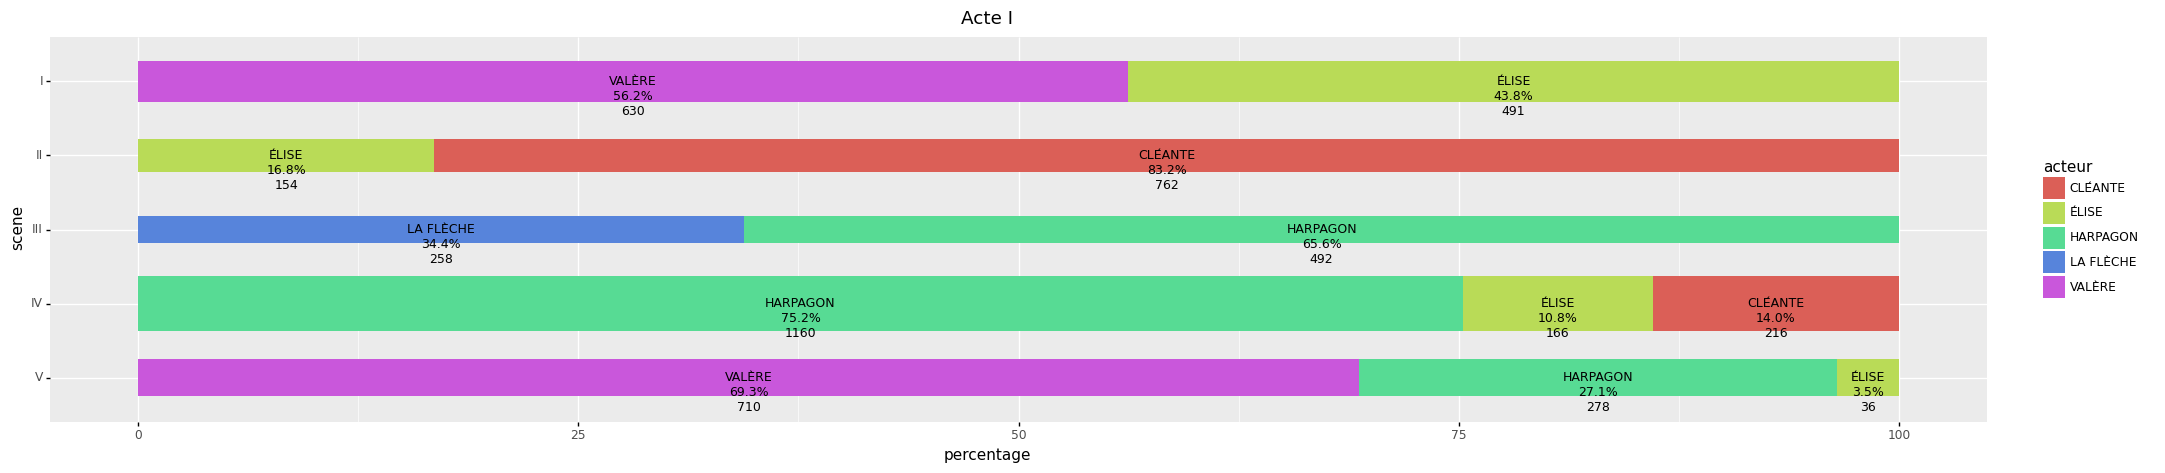

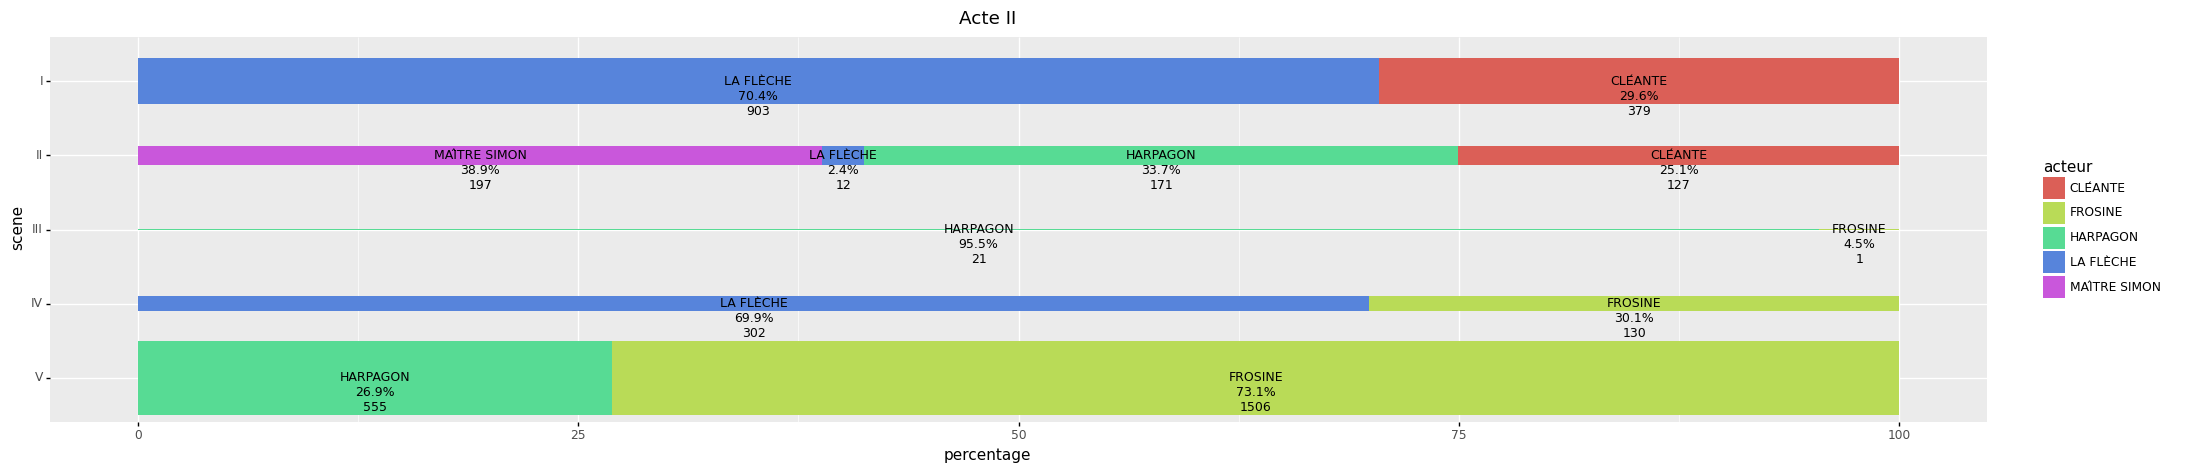

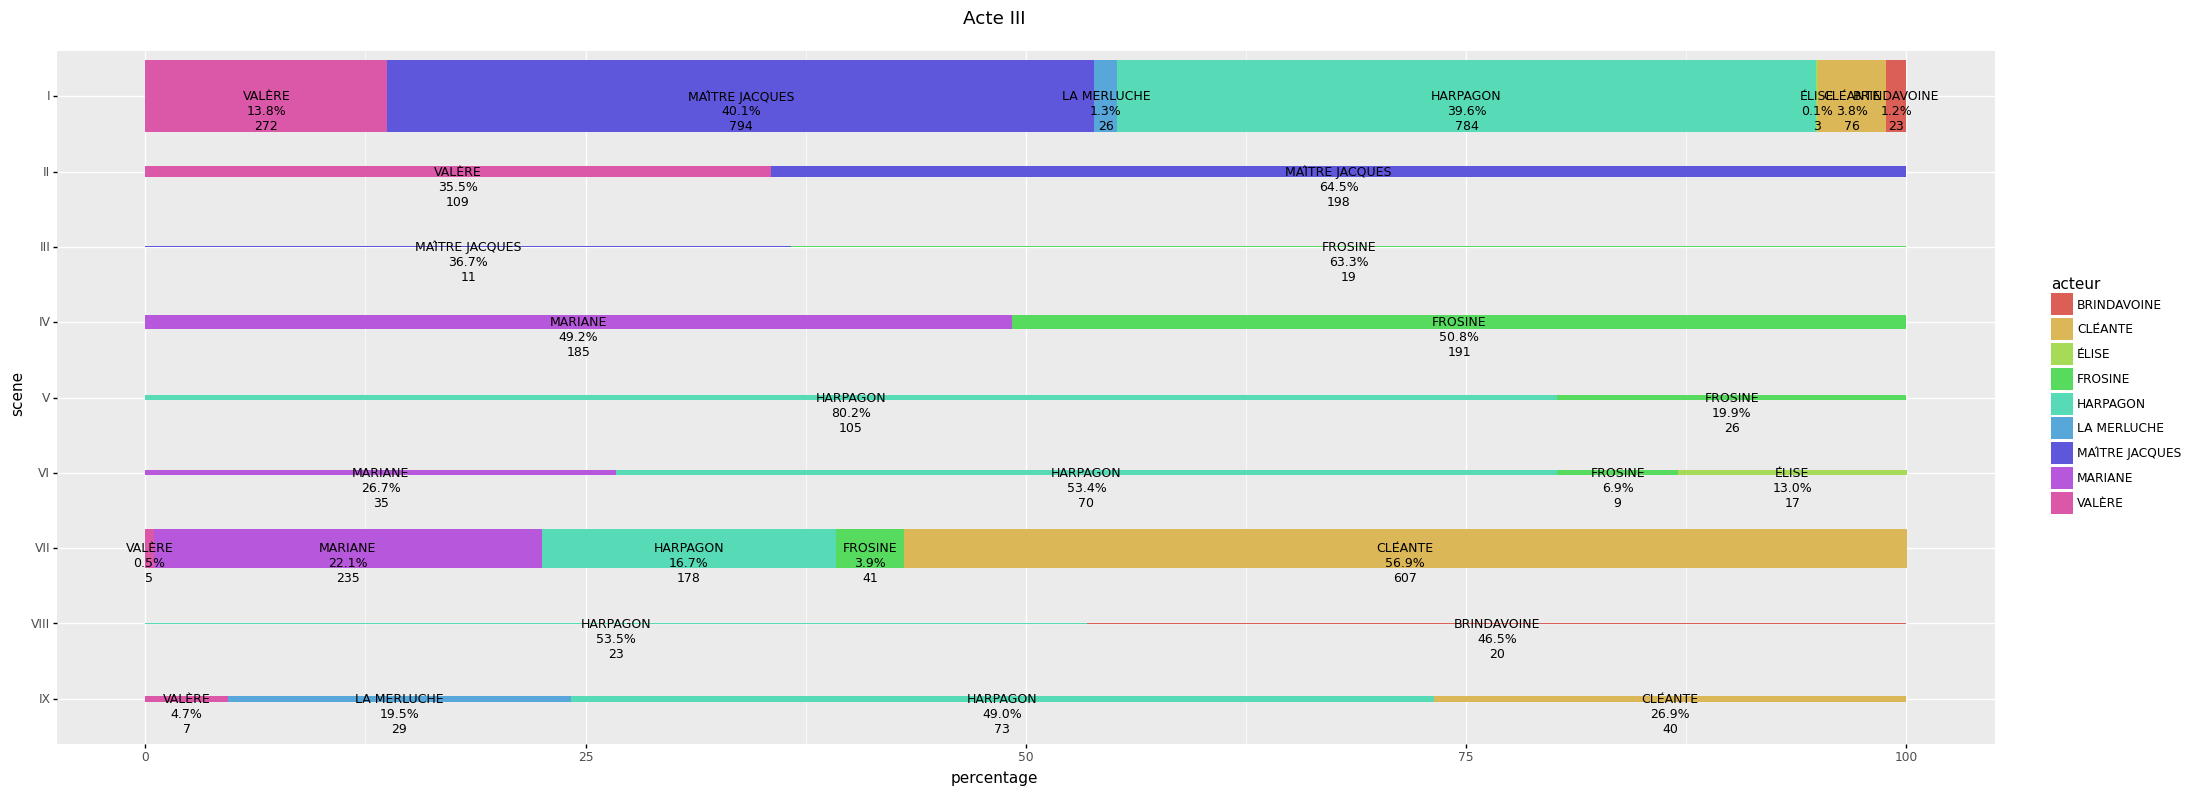

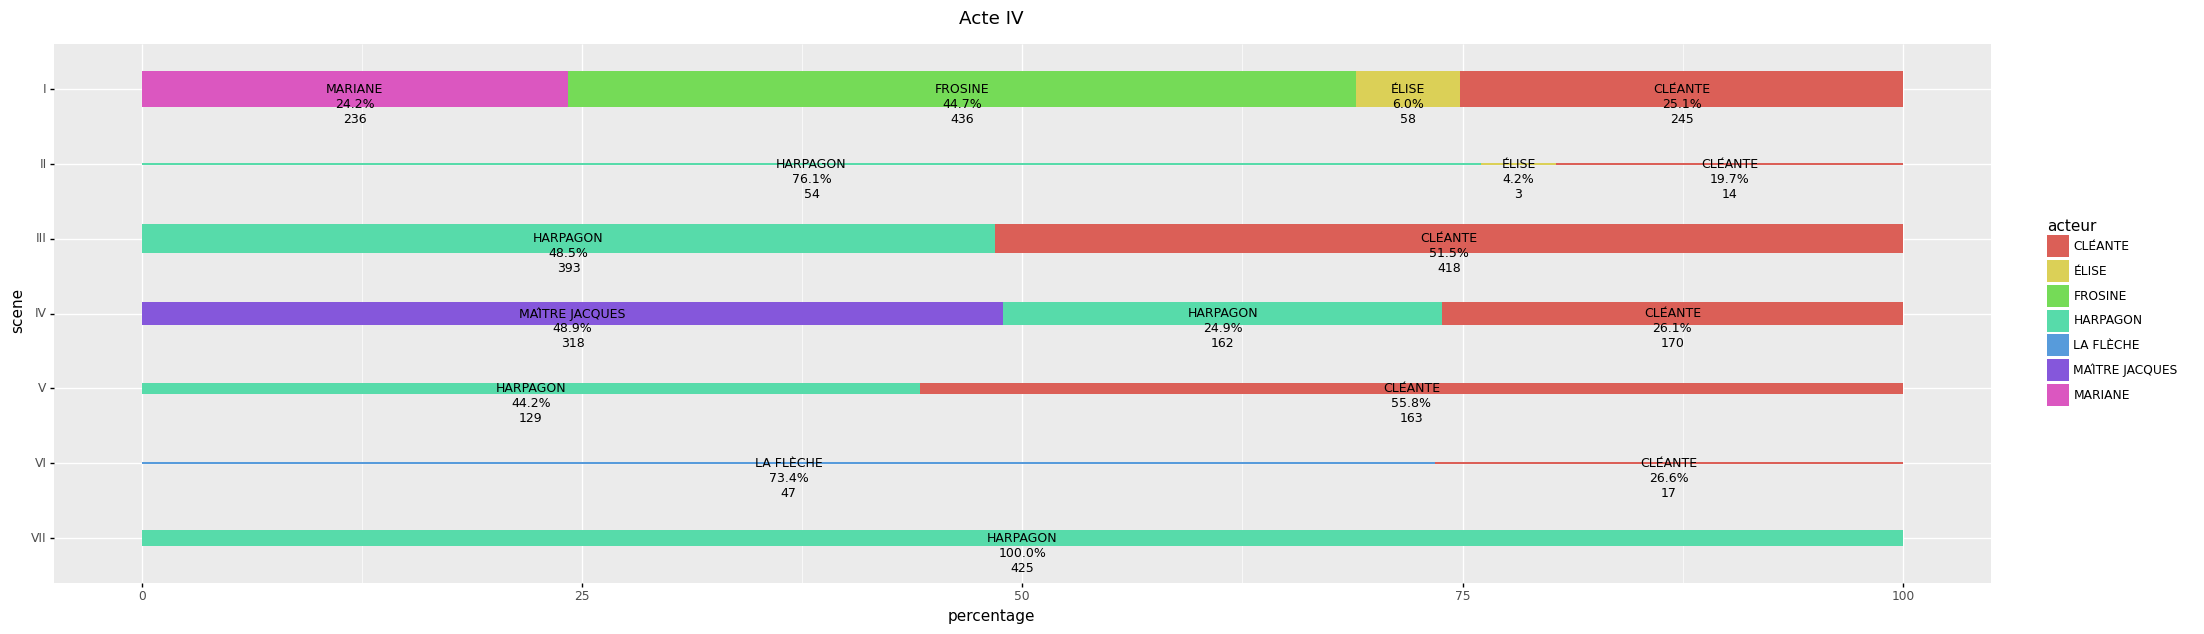

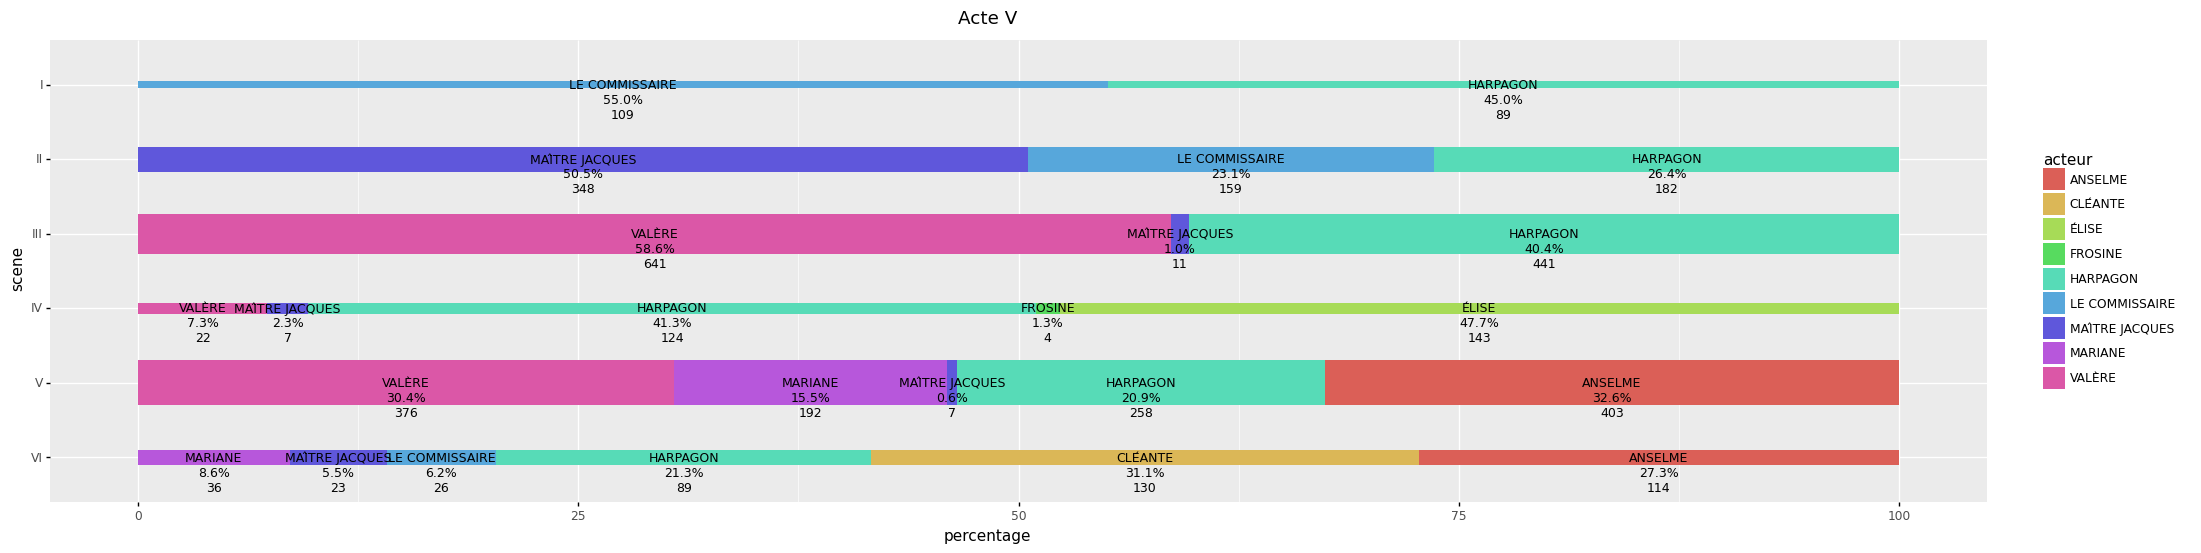

In [18]:
actes = agg['acte'].unique()
for sc in list(actes):
  aggb = agg[agg['acte'] == sc]
  fig = (ggplot(aggb, aes(x='scene', fill = 'acteur', y = 'perc', width='w')) + \
      geom_bar(stat = "identity") \
      + scale_x_discrete(limits=aggb['scene'].unique())\
      +geom_text(aes(label='perc'),size = 9, position = position_stack(vjust = 0.5),format_string='\n\n{:.1f}%')\
      +geom_text(aes(label='acteur'),size = 9, position = position_stack(vjust = 0.5))\
      +geom_text(aes(label='number_of_words'),size = 9, position = position_stack(vjust = 0.5),format_string='\n\n\n\n{}' )\
      + labs(y='percentage', x='scene', title='Acte {}'.format(sc))
      + coord_flip()).draw()
  sc_num = len(list(agg[agg['acte'] == sc]['scene'].unique()))
  fig.set_figheight(sc_num)
  fig.set_figwidth(25)
  fig.show()

## 3. 
**Optional**: Construct an interlocution graph to visualize the exchanges between the characters.

To display the graph of interactions. We assume that, in every scene, each time an actor speaks all the other actors in the scene are hearing the line. With that in mind we create a list of all the lines, with the author that says it as source, and all the other actors in the scene as the destination. 

In [19]:
aggc = (df.groupby(['acte_n','scene_n','set_acteurs','acteur'])['number_of_words'].sum()).reset_index()
print(aggc)
records = aggc[['set_acteurs','acteur','number_of_words']].to_records(index=False)
result = list(records)
print(result[0])

    acte_n  scene_n                                        set_acteurs  \
0        1        1                                    VALÈRE, ÉLISE   
1        1        1                                    VALÈRE, ÉLISE   
2        1        2                                   CLÉANTE, ÉLISE   
3        1        2                                   CLÉANTE, ÉLISE   
4        1        3                               HARPAGON, LA FLÈCHE   
..     ...      ...                                                ...   
90       5        6  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
91       5        6  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
92       5        6  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
93       5        6  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   
94       5        6  CLÉANTE, VALÈRE, MARIANE, ÉLISE, FROSINE, H...   

             acteur  number_of_words  
0            ÉLISE              491  
1           VALÈRE              

We want to create an adjacency matrix for the whole play. We create a dictionary with indexes for each actor to facilitate the filling of the matrix.

In [20]:
dc = {}
index = 0
for record in result:
  for ch in record[0].split(','):
    if ch.strip() not in dc:
      dc[ch.strip()] = index
      index +=1
dc_inv = {v: k for k, v in dc.items()}
print(dc)
print(dc_inv)
print(len(dc))

{'VALÈRE': 0, 'ÉLISE': 1, 'CLÉANTE': 2, 'HARPAGON': 3, 'LA FLÈCHE': 4, 'MAÎTRE SIMON': 5, 'FROSINE': 6, 'DAME CLAUDE': 7, 'MAÎTRE JACQUES': 8, 'BRINDAVOINE': 9, 'LA MERLUCHE': 10, 'MARIANE': 11, 'LE COMMISSAIRE': 12, 'SON CLERC': 13, 'ANSELME': 14}
{0: 'VALÈRE', 1: 'ÉLISE', 2: 'CLÉANTE', 3: 'HARPAGON', 4: 'LA FLÈCHE', 5: 'MAÎTRE SIMON', 6: 'FROSINE', 7: 'DAME CLAUDE', 8: 'MAÎTRE JACQUES', 9: 'BRINDAVOINE', 10: 'LA MERLUCHE', 11: 'MARIANE', 12: 'LE COMMISSAIRE', 13: 'SON CLERC', 14: 'ANSELME'}
15


We fill the adjacency matrix, taking into account that every row is for when the character is the source of the message and every column for when the character is the destination of the message. We observe that the diagonal corresponds to the total number of words said by each character.

In [21]:
adj = np.zeros((len(dc),len(dc)),dtype=int)
for record in result:
    for acteur_ecoute in record[0].split(','):
      adj[dc[record[1]]][dc[acteur_ecoute.strip()]] += record[2]
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in adj]))
max_node_size = np.max(adj*np.identity(len(dc),dtype=int))
max_edge_w = np.max(adj*((np.identity(len(dc),dtype=int)-1)**2))

2760	2022	284	2033	0	0	410	272	1420	272	279	410	1039	1039	376
673	1071	384	368	0	0	221	3	146	3	3	221	143	143	0
206	2090	3364	1961	653	127	1036	76	376	76	116	1036	130	130	130
1974	3091	3216	6256	752	171	1550	784	2040	807	857	974	1183	1183	347
0	0	962	270	1522	12	302	0	0	0	0	0	0	0	0
0	0	197	197	197	197	0	0	0	0	0	0	0	0	0
4	490	477	1587	130	0	2363	0	23	0	0	726	4	4	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
1040	831	1135	1508	23	0	48	794	1717	794	794	48	396	396	30
23	43	43	43	0	0	20	23	23	43	23	20	0	0	0
26	55	55	55	0	0	29	26	26	26	55	29	0	0	0
228	734	507	498	36	0	919	0	228	0	0	919	228	228	228
26	26	26	294	26	0	26	0	185	0	0	26	294	294	26
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
517	517	114	517	114	0	517	0	517	0	0	517	517	517	517
6256
3216


Finally we create our graph. Every cell in the diagonal corresponds to a node. Every other cell corresponds to a directed edge if the value is different from Zero. The size of the nodes and the weigths of the edges can be also taken into consideration, normalizing them by the max values present in the adjacency matrix.

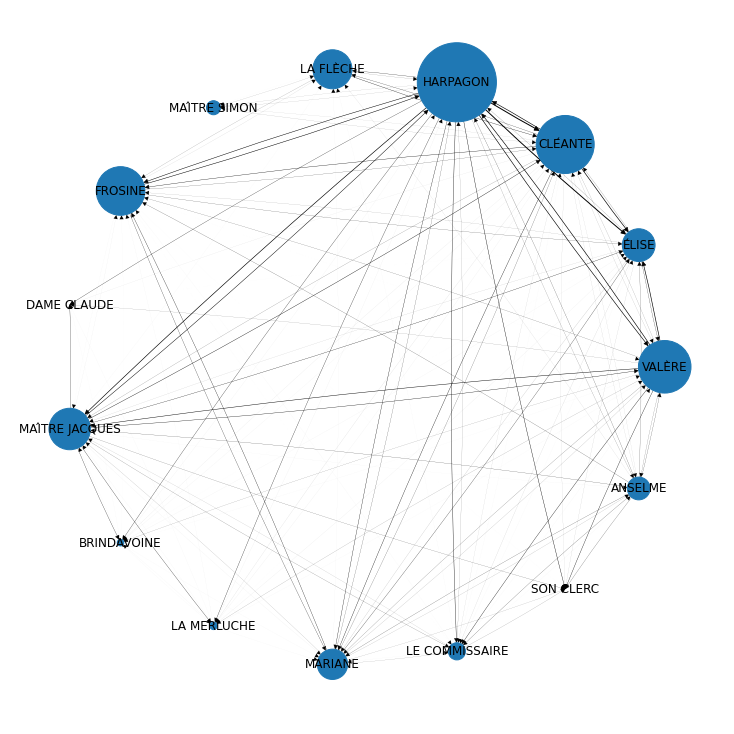

In [22]:
G = nx.DiGraph()
#add nodes
for i in range(len(dc)):
  G.add_node(dc_inv[i], size = adj[i][i])
#add edges
for i in range(len(dc)):
  for j in range(len(dc)):
    if i != j and adj[i][j] != 0:
      G.add_weighted_edges_from([(dc_inv[i], dc_inv[j], adj[i][j]/max_edge_w)])


edge_width = [a[2]['weight'] for a in G.edges(data=True)]
sizes = [a[1]['size'] for a in G.nodes(data=True)]

fig = plt.figure(figsize=(10,10))
pos = nx.circular_layout(G)
nx.draw(G,pos, with_labels=True, width=edge_width, node_size=sizes, arrowsize=10, connectionstyle='arc3, rad = 0.02')

ax = plt.gca()
ax.set_axis_off()
plt.show()

## Conclusion

Performing text analysis is not an easy task. Even when the text presents a "structure", the final document can be full of format exceptions that can cause bad data interpretation. There is a lot of factors to take into consideration and they will change for every single text. It is important then to adquire experience in the field, so that the next time we can have an idea of the possible scenarios that we migth encounter.\
\
Some improvements to the analysis can be done. First, we could omit somme common words in order to work with only meaninful sentences, opening the door to semantic analysis. Second, We can try to estimate better the way the dialogues are routed, instead of making all the people in the scene the destination of every line.





